# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import cv2
import random

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 2. Load in the data

In [2]:
data_direc = 'geometric shapes dataset'
#Obtain the name of the class directories
classes = os.listdir(data_direc)
    
#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

for i,j in enumerate(classes):
    label = i
    path = data_direc+'/'+str(j)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_AREA) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list

## 3. Display some images

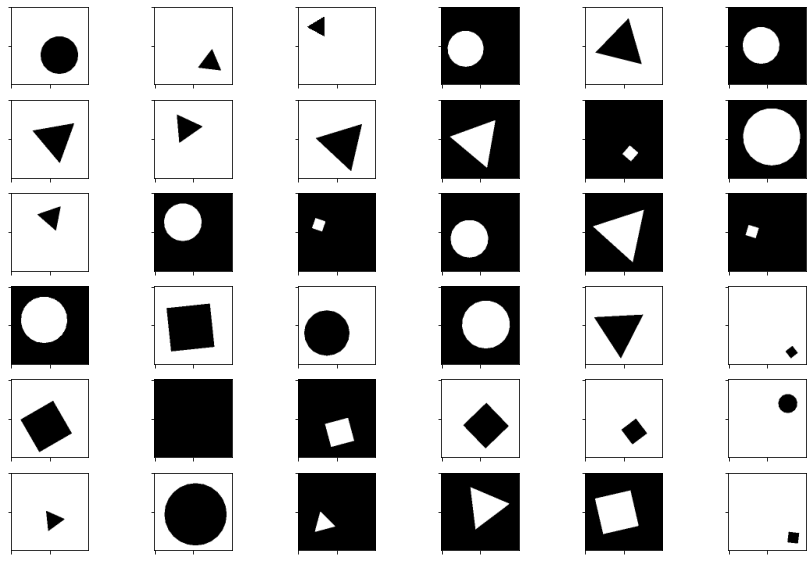

In [25]:
#initialize a subplot to hold the images
dim = 6
fig, ax = plt.subplots(dim, dim, figsize=(15,10))

for i in range(dim):
    for j in range(dim):
        ax[i,j].imshow(data[random.randint(0, len(data)-1)], cmap='gray') #display random image from set
        ax[i,j].set_xticklabels([]) #remove x ticks
        ax[i,j].set_yticklabels([]) #remove y ticks

## 4. Split data into training and testing

In [26]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.2, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 100, 100, 1)
(6000, 100, 100, 1)
(24000, 3)
(6000, 3)


## 5. Convolutional Neural Network Setup

In [27]:
#initialize model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

#fully connected neural network
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.28))
model.add(Dense(3, activation = "softmax"))

## 6. Compile and fit the model

In [28]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model on the training and testing sets
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
188/188 [==============================] - 38s 197ms/step - loss: 1.0376 - accuracy: 0.4415 - val_loss: 0.9563 - val_accuracy: 0.5408
Epoch 2/20
188/188 [==============================] - 39s 209ms/step - loss: 0.8806 - accuracy: 0.5717 - val_loss: 0.7604 - val_accuracy: 0.6565
Epoch 3/20
188/188 [==============================] - 40s 214ms/step - loss: 0.7078 - accuracy: 0.6717 - val_loss: 0.5888 - val_accuracy: 0.7210
Epoch 4/20
188/188 [==============================] - 37s 196ms/step - loss: 0.5469 - accuracy: 0.7582 - val_loss: 0.4473 - val_accuracy: 0.8088
Epoch 5/20
188/188 [==============================] - 38s 201ms/step - loss: 0.4477 - accuracy: 0.8065 - val_loss: 0.3536 - val_accuracy: 0.8610
Epoch 6/20
188/188 [==============================] - 37s 200ms/step - loss: 0.3784 - accuracy: 0.8402 - val_loss: 0.3201 - val_accuracy: 0.8568
Epoch 7/20
188/188 [==============================] - 40s 211ms/step - loss: 0.3413 - accuracy: 0.8569 - val_loss: 0.2656 - val_ac

## 7. Evaluate training loss vs validation loss

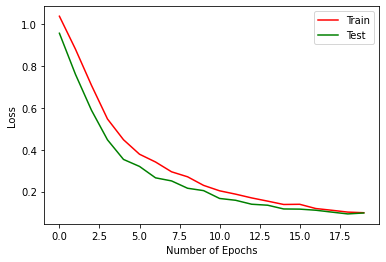

In [29]:
#check the loss
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## 8. Evaluate training accuracy vs validation accuracy

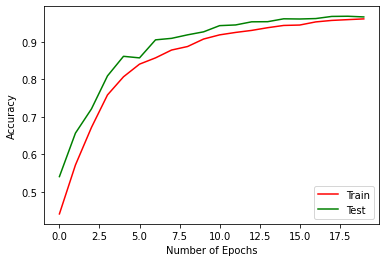

In [30]:
#check the accuracy
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## 9. Display Accuracy of Model

In [31]:
model_accuracy = model.evaluate(x_test,y_test, verbose = 0)
print("accuracy of model: ", model_accuracy[1])

accuracy of model:  0.965833306312561


## 10. Confusion Matrix

188/188 [==============================] - 2s 12ms/step


<AxesSubplot: >

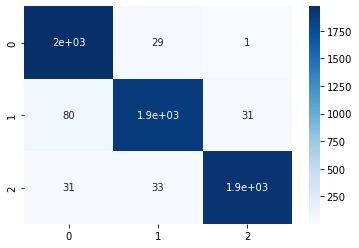

In [32]:
#labels predicted from model
y_pred = np.argmax(model.predict(x_test), axis=1)
#true, testing labels
y_true = np.argmax(y_test, axis=1)
#confusion matrix to display results
conf_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues")